In [1]:

# use pandas to import and manipulate data
import pandas as pd

# use data spliter to simplfy the train and test data organisation
from sklearn.model_selection import train_test_split  #very frequently used

# Libraries 

from sklearn import linear_model 
from sklearn import datasets

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [2]:
from sklearn.datasets import load_boston
dataset = load_boston()
type(dataset)

sklearn.utils.Bunch

# Import Data

In [3]:
#data

from sklearn.datasets import load_boston
dataset = load_boston()

Boston_DF = pd.DataFrame(dataset.data, columns=dataset.feature_names)

Boston_DF['Price'] = dataset.target 

In [4]:
#look at the data and the stats


### How many features and samples are in this dataset?


In [5]:
# answer
Boston_DF.shape

(506, 14)

### What do the first 5 lines of the data look like?

In [6]:
# answer
Boston_DF.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Attribute Information:

 #   1. CRIM      per capita crime rate by town
  #  2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
   # 3. INDUS     proportion of non-retail business acres per town
   # 4. CHAS      Charles River dummy variable (= 1 if tract bounds 
    #             river; 0 otherwise)
    #5. NOX       nitric oxides concentration (parts per 10 million)
    #6. RM        average number of rooms per dwelling
    #7. AGE       proportion of owner-occupied units built prior to 1940
    #8. DIS       weighted distances to five Boston employment centres
    #9. RAD       index of accessibility to radial highways
    #10. TAX      full-value property-tax rate per $10,000
    #11. PTRATIO  pupil-teacher ratio by town
    #12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
     #            by town
    #13. LSTAT    % lower status of the population
    #14. MEDV     Median value of owner-occupied homes in $1000's


In [8]:
Boston_DF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


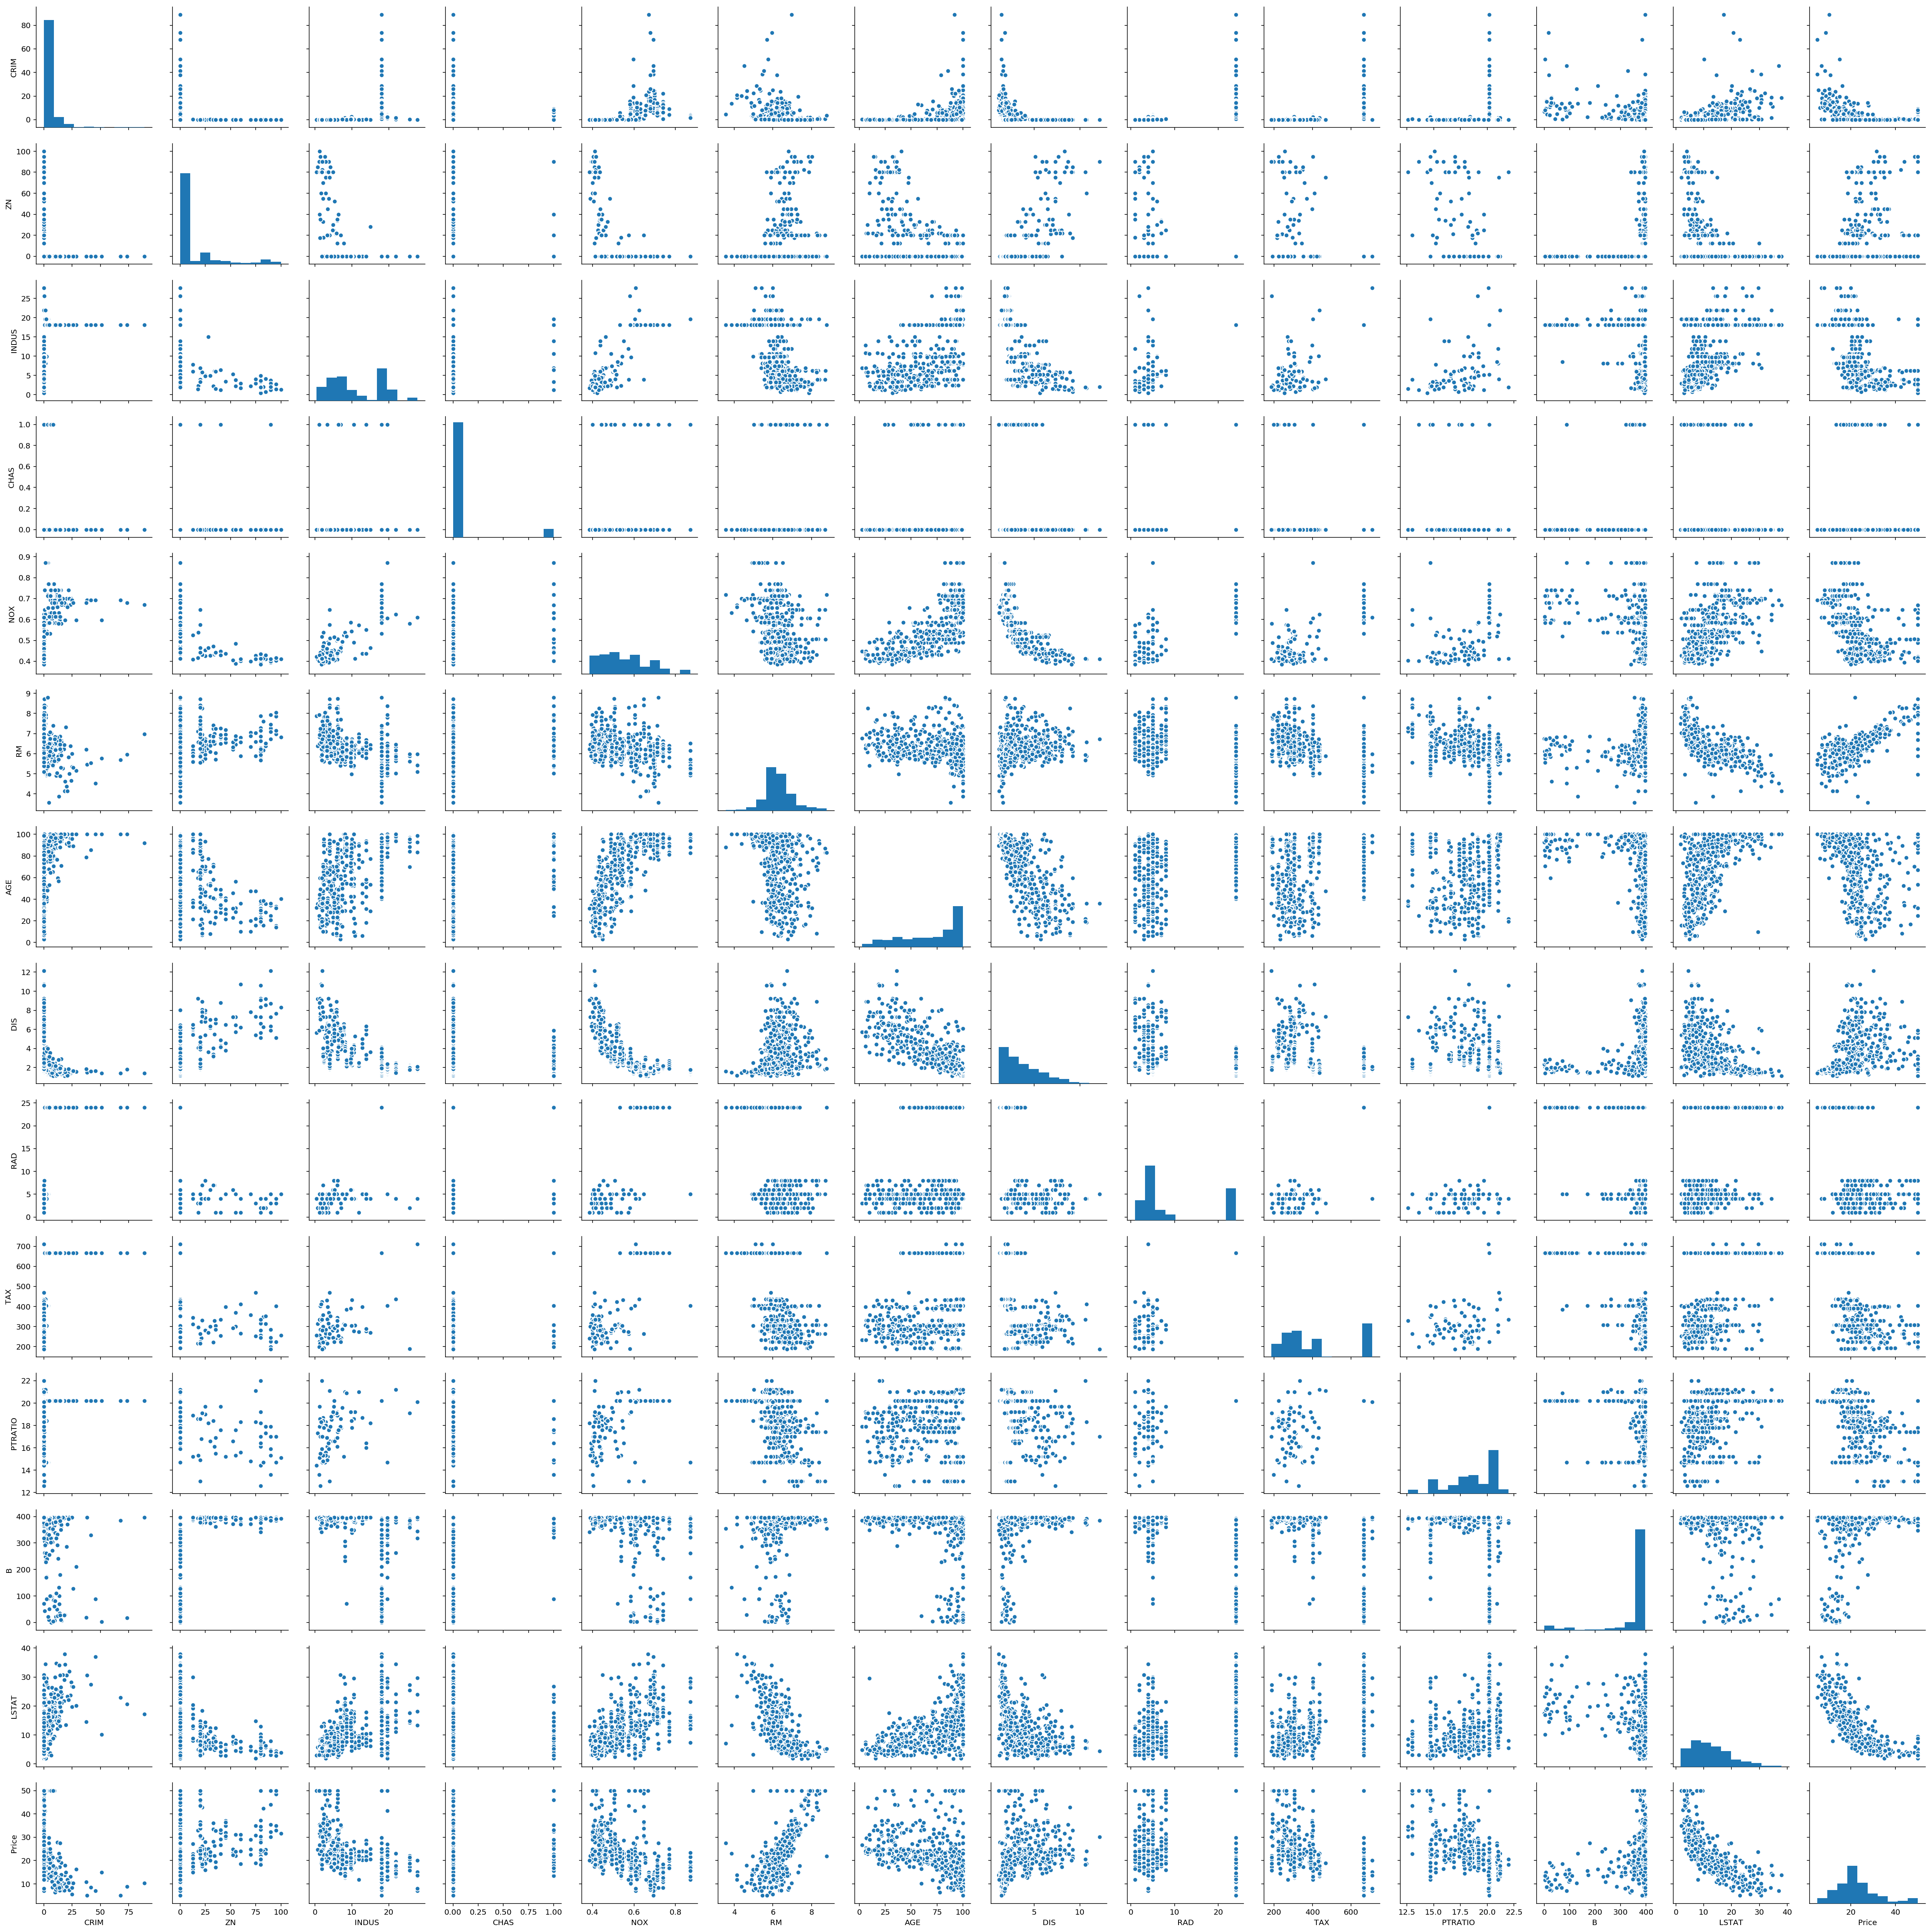

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(Boston_DF)

# Split the data

In [10]:
# separate the target variable, price from the dataset
X = Boston_DF.drop(columns=['Price'])
Y = Boston_DF['Price']

In [11]:
# Split the data into a training and testing set (test size = 20%; random state = 42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
# initisalise an instance of the linearRegression class
from sklearn.linear_model import  LinearRegression
model = LinearRegression()
# fit the model on the training data
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#  Make Predictions

In [23]:
# get predictions of testing data
Y_test_pred = model.predict(X_test)
#OLS coefficions
model.coef_

array([ -1.12463481e-01,   3.00810168e-02,   4.07309919e-02,
         2.78676719e+00,  -1.72406347e+01,   4.43248784e+00,
        -6.23998173e-03,  -1.44848504e+00,   2.62113793e-01,
        -1.06390978e-02,  -9.16398679e-01,   1.24516469e-02,
        -5.09349120e-01])

# Check Performance of the model

In [14]:
# calculate r2 score and mse
r2_score(Y_test, Y_test_pred)

0.6684825753971575

In [15]:
mean_squared_error(Y_test, Y_test_pred)

24.311426929693571